# **Data Cleaning & EDA Practice** 
by Daniel Lee

The main purpose of this project is to clean the data and exmplanatory data analysis

In [88]:
import pandas as pd
import numpy as np
import math
import nltk
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
# from nltk.corpus import stopwords
import re

The data file is in the data directory and file type is csv file.

## **Data Description**


In [89]:
csv_file_path = "../data/Food_choices/food_coded.csv"
data_ori = pd.read_csv(csv_file_path, delimiter=',', quotechar='"', encoding='utf-8')
data_cleaning = data_ori.copy()

In [90]:
data_cleaning.info()
# data_cleaning.drop_duplicates() # check duplicate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

Pandas.Dataframe.select_dtypes() function: Return a subset of the dataframe based on the datatypes of column.

In [91]:
# pandas.Dataframe.select_dtypes() function: Return a subset of the DataFrame’s columns based on the column dtypes.

obj_df = data_cleaning.select_dtypes(include=['object'])
num_df = data_cleaning.select_dtypes(exclude=['object'])

#helpfunction to seperate categorical and numerical features


'''separates non-numeric and numeric columns'''
print("Non-Numeric columns:")
for col in obj_df:
    print(col)
print("\nNumeric columns:")
for col in num_df:
    print(col)



Non-Numeric columns:
GPA
comfort_food
comfort_food_reasons
diet_current
eating_changes
father_profession
fav_cuisine
food_childhood
healthy_meal
ideal_diet
meals_dinner_friend
mother_profession
type_sports
weight

Numeric columns:
Gender
breakfast
calories_chicken
calories_day
calories_scone
coffee
comfort_food_reasons_coded
cook
comfort_food_reasons_coded.1
cuisine
diet_current_coded
drink
eating_changes_coded
eating_changes_coded1
eating_out
employment
ethnic_food
exercise
father_education
fav_cuisine_coded
fav_food
fries
fruit_day
grade_level
greek_food
healthy_feeling
ideal_diet_coded
income
indian_food
italian_food
life_rewarding
marital_status
mother_education
nutritional_check
on_off_campus
parents_cook
pay_meal_out
persian_food
self_perception_weight
soup
sports
thai_food
tortilla_calories
turkey_calories
veggies_day
vitamins
waffle_calories


### There are a few problems for missing data method

    * For example, by dropping rows/columns, you’re essentially losing information that might be useful for prediction

    * On the other hand, imputing values will introduce bias to your data but it still might better than removing your features.

___
Here is a great analogy for this dilemma in this article by Elite Data Science.

Missing data is like missing a puzzle piece. If you drop it, that’s like pretending the puzzle slot isn’t there. If you impute it, that’s like trying to squeeze in a piece from somewhere else in the puzzle.

source:
https://medium.com/bitgrit-data-science-publication/data-cleaning-with-python-f6bc3da64e45
___

#### Check if there's duplicate

In [92]:
data_cleaning.isnull().sum().sort_values(ascending = False)
# .sum() funciton return series(dataframe with one column; have different parameter from dataframe)

type_sports                     26
calories_day                    19
comfort_food_reasons_coded      19
cuisine                         17
exercise                        13
                                ..
comfort_food_reasons_coded.1     0
diet_current_coded               0
ethnic_food                      0
eating_out                       0
fruit_day                        0
Length: 61, dtype: int64

In [93]:
#checking duplicate rows
data_cleaning.loc[data_cleaning.duplicated()]

# Checking duplicate for the unique key 
# data_cleaning.loc[data_cleaning.duplicated(subset = ["name"])]

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight


## Droping Feature

In [94]:
'''
Threshold for drop attributes would be 30% for big data and 20% for small data.
'''

'''
shape function give give dimension of the dataframe which is [x,y]. length:x -> index(row) = 0, width(column):y -> index = 1
Thus, we can use that info to find number of data and attributes.
'''
# dropna(thresh): Require that many non-NA values.

data_cleaning = data_ori.copy()
thresh4data_col = data_cleaning.shape[0]*0.8
thresh4data_row = data_cleaning.shape[1]*0.8

data_cleaning = data_cleaning.dropna(axis =1, thresh=thresh4data_col)
# dropna() function returns a new DataFrame with missing values removed and does not modify the original DataFrame in place.
data_cleaning = data_cleaning.dropna(axis =0, thresh=thresh4data_row)

    When we use the dtypes function to distinguish between categorical and numerical data, we may find that some features that appear to be numerical are instead assigned to the categorical type.
    
    We have observed that the features, GPA and Weight, have the potential to be represented as numerical data. However, the raw data in these features require cleaning to achieve this representation.

In [95]:
obj_df.head()

,GPA,comfort_food,comfort_food_reasons,diet_current,eating_changes,father_profession,fav_cuisine,food_childhood,healthy_meal,ideal_diet,meals_dinner_friend,mother_profession,type_sports,weight
0,2.4,none,we dont have comfort,eat good and exercise,eat faster,profesor,Arabic cuisine,rice and chicken,looks not oily,being healthy,"rice, chicken, soup",unemployed,car racing,187
1,3.654,"chocolate, chips, ice cream","Stress, bored, anger",I eat about three times a day with some snacks...,I eat out more than usual.,Self employed,Italian,"chicken and biscuits, beef soup, baked beans","Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,"Pasta, steak, chicken",Nurse RN,Basketball,155
2,3.3,"frozen yogurt, pizza, fast food","stress, sadness","toast and fruit for breakfast, salad for lunch...",sometimes choosing to eat fast food instead of...,owns business,italian,"mac and cheese, pizza, tacos",usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,"chicken and rice with veggies, pasta, some kin...",owns business,none,I'm not answering this.
3,3.2,"Pizza, Mac and cheese, ice cream",Boredom,"College diet, cheap and easy foods most nights...",Accepting cheap and premade/store bought foods,Mechanic,Turkish,"Beef stroganoff, tacos, pizza","Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",Grilled chicken \rStuffed Shells\rHomemade Chili,Special Education Teacher,NaN,"Not sure, 240"
4,3.5,"Ice cream, chocolate, chips","Stress, boredom, cravings",I try to eat healthy but often struggle becaus...,I have eaten generally the same foods but I do...,IT,Italian,"Pasta, chicken tender, pizza","A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",Substance Abuse Conselor,Softball,190


    We have observed that certain data columns are currently stored as object data types; however, they are expected to be represented as floats. 
    
    To detect non-numerical data within a column, we can examine the unique values present in that specific column.

In [96]:
print(obj_df['GPA'].unique())
print(obj_df['weight'].unique())

['2.4' '3.654' '3.3' '3.2' '3.5' '2.25' '3.8' '3.904' '3.4' '3.6' '3.1'
 nan '4' '2.2' '3.87' '3.7' '3.9' '2.8' '3' '3.65' '3.89' '2.9' '3.605'
 '3.83' '3.292' '3.35' 'Personal ' '2.6' '3.67' '3.73' '3.79 bitch' '2.71'
 '3.68' '3.75' '3.92' 'Unknown' '3.77' '3.63' '3.882']
['187' '155' "I'm not answering this. " 'Not sure, 240' '190' '180' '137'
 '125' '116' '110' '264' '123' '185' '145' '170' '135' '165' '175' '195'
 '105' '160' '167' '115' '205' nan '128' '150' '140' '120' '100' '113'
 '168' '169' '200' '265' '192' '118' '210' '112' '144 lbs' '130' '127'
 '129' '260' '184' '230' '138' '156']


In [97]:
##If you examine the data types of the values, you'll notice that the majority of them are stored as strings, even though they appear to be numerical in nature.

# Use regular expression to find the numeric part
for x in obj_df['GPA'].unique():

    if not isinstance(x, float):
        match = re.search(r'\d+\.\d+|\d+', x)

        if match:
            # Extract and convert the matched part to a float
            convert_float = float(match.group())
        obj_df['GPA'] =obj_df['GPA'].replace(x, convert_float)


for x in obj_df['weight'].unique():

    if not isinstance(x, float):
        match = re.search(r'\d+\.\d+|\d+', x)

        if match:
            # Extract and convert the matched part to a float
            convert_float = float(match.group())
        obj_df['weight'] =obj_df['weight'].replace(x, convert_float)



In [98]:
print(obj_df['GPA'].unique())
print(obj_df['weight'].unique())

[2.4   3.654 3.3   3.2   3.5   2.25  3.8   3.904 3.4   3.6   3.1     nan
 4.    2.2   3.87  3.7   3.9   2.8   3.    3.65  3.89  2.9   3.605 3.83
 3.292 3.35  2.6   3.67  3.73  3.79  2.71  3.68  3.75  3.92  3.77  3.63
 3.882]
[187. 155. 240. 190. 180. 137. 125. 116. 110. 264. 123. 185. 145. 170.
 135. 165. 175. 195. 105. 160. 167. 115. 205.  nan 128. 150. 140. 120.
 100. 113. 168. 169. 200. 265. 192. 118. 210. 112. 144. 130. 127. 129.
 260. 184. 230. 138. 156.]


In [99]:
# The drop() method will remove an entire row from a DataFrame when given a single index label, instead of removing a single value from a specific column.

data_cleaning[['GPA', 'weight']] = obj_df[['GPA', 'weight']]
obj_df = obj_df.drop(columns=['GPA', 'weight'],axis=1) 
num_df = data_cleaning.select_dtypes(exclude=['object'])


In [100]:
obj_columns = data_cleaning.select_dtypes(include="object").columns

# use lambda function tp convert it to lowercase
data_cleaning[obj_columns] = data_cleaning[obj_columns].apply(lambda x: (x.str.lower()))

    
data_cleaning[obj_columns].head()
# print(data_cleaning['fav_cuisine'].unique())

,comfort_food,comfort_food_reasons,diet_current,eating_changes,father_profession,fav_cuisine,food_childhood,healthy_meal,ideal_diet,meals_dinner_friend,mother_profession
0,none,we dont have comfort,eat good and exercise,eat faster,profesor,arabic cuisine,rice and chicken,looks not oily,being healthy,"rice, chicken, soup",unemployed
1,"chocolate, chips, ice cream","stress, bored, anger",i eat about three times a day with some snacks...,i eat out more than usual.,self employed,italian,"chicken and biscuits, beef soup, baked beans","grains, veggies, (more of grains and veggies),...",try to eat 5-6 small meals a day. while trying...,"pasta, steak, chicken",nurse rn
2,"frozen yogurt, pizza, fast food","stress, sadness","toast and fruit for breakfast, salad for lunch...",sometimes choosing to eat fast food instead of...,owns business,italian,"mac and cheese, pizza, tacos",usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,"chicken and rice with veggies, pasta, some kin...",owns business
3,"pizza, mac and cheese, ice cream",boredom,"college diet, cheap and easy foods most nights...",accepting cheap and premade/store bought foods,mechanic,turkish,"beef stroganoff, tacos, pizza","fresh fruits& vegetables, organic meats","healthy, fresh veggies/fruits & organic foods",grilled chicken \rstuffed shells\rhomemade chili,special education teacher
4,"ice cream, chocolate, chips","stress, boredom, cravings",i try to eat healthy but often struggle becaus...,i have eaten generally the same foods but i do...,it,italian,"pasta, chicken tender, pizza","a lean protein such as grilled chicken, green ...",ideally i would like to be able to eat healthi...,"chicken parmesan, pulled pork, spaghetti and m...",substance abuse conselor


    In the Kaggle codebook, the data source provider has mentioned that some features are well-suited for Natural Language Processing (NLP). As a result, I leveraged three specific features: comfort_food, comfort_food_reasons, and diet_current. My tool of choice for this task was the NLTK Python library.

    I selected NLTK as my framework for implementing natural language processing.

## NLTK implementation (NLP)

In [101]:
## NOTE: Tools for NLTK package

tokenizer = TreebankWordTokenizer()
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer() 

In [102]:
'''packages to download '''

# nltk.download("stopwords")
# nltk.download("averaged_perceptron_tagger")
# nltk.download("maxent_ne_chunker")
# nltk.download("words")

'packages to download '

This document serve as references for categorizing food when working on converting string data into categorical data.

https://www.ars.usda.gov/ARSUserFiles/80400530/pdf/1112/food_category_list.pdf


In [103]:
# NOTE: select the data that we are going to apply NLP

data_nlp = data_cleaning[['comfort_food', 'comfort_food_reasons', 'diet_current']]

data_nlp = data_nlp.astype(str)
# data_nlp = data_nlp.applymap(lambda x: x.strip()) # remove space
data_nlp_prev = data_nlp ## copies of orginal data to compare before and after

### Chunk Function

In [104]:
'''This is main function that chunk the sentence into word with POS tag using parser. It will also create tree that shows structure of sentence'''
def chunk_NP(text):    
    grammar =  r'''
    NP: {<NN.*>|<RB>?<NN.*>+|<NN><CC><NN>|<DT>?<NN.*>+<POS>?}
    '''

    '''
    The rule states that whenever the chunk finds an optional determiner (DT) followed by any number of adjectives (JJ) and then a noun (NN) then the Noun Phrase(NP) chunk should be formed.
    '''
    
    '''RB for extract 'and', NN.* for any word tagged as a noun (NN) along with any additional modifiers
    '''

    if type(text) is not str:
        return ['none']
    else:    
        
        tokens = nltk.word_tokenize(text)
        lotr_pos_tags = nltk.pos_tag(tokens)
        chunk_parser = nltk.RegexpParser(grammar)
        tree = chunk_parser.parse(lotr_pos_tags)

        noun_phrases = []
        for subtree in tree.subtrees():
            if subtree.label() =='NP':
                np_parts = []
                for leaf in subtree.leaves():
                    np_parts.append(lemmatizer.lemmatize(leaf[0]))
                noun_phrases.append(" ".join(np_parts))

        
        return noun_phrases, tree


In [105]:
def draw_tree(text):
    np_draw,tree_draw = chunk_NP(text)
    tree_draw.draw()



In [106]:
comfort_food_col1 = []
comfort_food_col2 = []


for x in range(len(data_nlp["comfort_food"])):
    a,_ = chunk_NP(data_nlp.loc[x,'comfort_food'])
    comfort_food_col1.append(a)

    b,_ = chunk_NP(data_nlp.loc[x, 'comfort_food_reasons'])
    comfort_food_col2.append(b)

comfort_food_col1 = [[lemmatizer.lemmatize(word) for word in inner_list] for inner_list in comfort_food_col1]


flat_list_1st = [item for sublist in comfort_food_col1 for item in sublist]



print(sorted(set(flat_list_1st), reverse = False))
# print(set(flat_list_1st)) #TODO check the output


['/', 'almond', 'any kind', 'anything', 'bagel', 'banana', 'bar', 'beef', 'bread', 'bread/crackers', 'broccoli', 'brownie', 'burger', 'burrito', 'butter', 'cake', 'candy', 'capps', 'carrot', 'cereal', 'cheese', 'cheeseburger', 'cheesecake', 'cheez-its', 'chex-mix', 'chicken', 'chilli', 'chip', 'chipotle', 'chocolate', 'coffee', 'cookie', 'cooky', 'cornbread', 'cottage', 'crea', 'cream', 'cream/milkshake', 'cup', 'curry', 'debbie', 'deli', 'dessets', 'dip', 'dish', 'donut', 'doritos', 'dough', 'doughnut', 'egg', 'fast food', 'finger', 'fire', 'food', 'fritos', 'fruit', 'fry', 'grandma', 'grape', 'hamburger', 'home', 'homemade', 'ice', 'ice-cream', 'icecream', 'jerky', 'jims', 'kat', 'kit', 'lasagna', 'lasagne', 'mac', 'macaroni', 'macaroon', 'masala', 'mcdonalds', 'meatball', 'milkshake', 'mix', 'moe', 'moes', 'mozzarella', 'naan', 'nan', 'none', 'noodle', 'nugget', 'nuggs', 'nutella', 'omelet', 'pancake', 'pasta', 'peanut', 'pepper', 'pepsi', 'pie', 'pierogies', 'pizza', 'pop', 'popcor

### These are the results from the unique value from comfort_food:

['/', 'almond', 'any kind', 'anything', 'bagel', 'banana', 'bar', 'beef', 'bread', 'bread/crackers', 'broccoli', 'brownie', 'burger', 'burrito', 'butter', 'cake', 'candy', 'capps', 'carrot', 'cereal', 'cheese', 'cheeseburger', 'cheesecake', 'cheez-its', 'chex-mix', 'chicken', 'chilli', 'chip', 'chipotle', 'chocolate', 'coffee', 'cookie', 'cooky', 'cornbread', 'cottage', 'crea', 'cream', 'cream/milkshake', 'cup', 'curry', 'debbie', 'deli', 'dessets', 'dip', 'dish', 'donut', 'doritos', 'dough', 'doughnut', 'egg', 'fast food', 'finger', 'fire', 'food', 'fritos', 'fruit', 'fry', 'grandma', 'grape', 'hamburger', 'home', 'homemade', 'ice', 'ice-cream', 'icecream', 'jerky', 'jims', 'kat', 'kit', 'lasagna', 'lasagne', 'mac', 'macaroni', 'macaroon', 'masala', 'mcdonalds', 'meatball', 'milkshake', 'mix', 'moe', 'moes', 'mozzarella', 'naan', 'nan', 'none', 'noodle', 'nugget', 'nuggs', 'nutella', 'omelet', 'pancake', 'pasta', 'peanut', 'pepper', 'pepsi', 'pie', 'pierogies', 'pizza', 'pop', 'popcorn', 'pot', 'potato', 'pretzals', 'pretzel', 'protein', 'quinoa', 'ranch', 'reese', 'rice', 'ritz', 'salsa', 'salt', 'salty', 'sandwhich', 'sandwich', 'slim', 'snack', 'soda', 'soup', 'spaghetti', 'sponge', 'squash', 'stick', 'sub', 'sushi', 'sweet', 'tikka', 'toast', 'tomato', 'truffle', 'tuna', 'twizzlers', 'vinegar', 'watermelon', 'wine', 'wing', 'yogurt']





#### I manually removed certain words from the list that were not appropriate for describing food.


In [107]:
list_keep_1st = ['almond', 'bagel', 'banana', 'bar', 'beef', 'bread', 'broccoli', 'brownie', 'burger', 'burrito', 'butter', 'cake', 'candy', 'capps', 'carrot', 'cereal', 'cheese', 'cheeseburger', 'cheesecake', 'chicken', 'chilli', 'chip', 'chipotle', 'chocolate', 'coffee', 'cookie', 'cooky', 'cornbread', 'cottage', 'cream', 'curry', 'dip', 'doritos', 'dough', 'doughnut', 'egg', 'fast food', 'fritos', 'fruit', 'fry', 'grape', 'hamburger', 'jerky', 'jims', 'lasagna','macaroni', 'macaroon', 'masala', 'mcdonalds', 'meatball', 'milkshake', 'mozzarella', 'naan', 'noodle', 'nugget', 'nutella', 'omelet', 'pancake', 'pasta', 'peanut', 'pepper', 'pepsi', 'pie', 'pierogies', 'pizza', 'popcorn', 'pot', 'potato', 'pretzals', 'pretzel', 'protein', 'quinoa', 'ranch', 'rice', 'ritz', 'salsa', 'salt', 'sandwhich', 'sandwich', 'slim', 'snack', 'soda', 'soup', 'spaghetti', 'squash', 'stick', 'sub', 'sushi', 'sweet', 'tikka', 'toast', 'tomato', 'truffle', 'tuna', 'twizzlers', 'vinegar', 'watermelon', 'wine', 'wing', 'yogurt']



list_remove_1st = list(set(flat_list_1st)-set(list_keep_1st))
print(sorted(list_remove_1st)) ##TODO Check what words werer sorted out 


['/', 'any kind', 'anything', 'bread/crackers', 'cheez-its', 'chex-mix', 'crea', 'cream/milkshake', 'cup', 'debbie', 'deli', 'dessets', 'dish', 'donut', 'finger', 'fire', 'food', 'grandma', 'home', 'homemade', 'ice', 'ice-cream', 'icecream', 'kat', 'kit', 'lasagne', 'mac', 'mix', 'moe', 'moes', 'nan', 'none', 'nuggs', 'pop', 'reese', 'salty', 'sponge']


In [108]:
data_cleaning

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,3.0,1.0,1.0,1,1165.0,345,5,1,1315,187.0
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","stress, bored, anger",1.0,...,3.0,1.0,1.0,2,725.0,690,4,2,900,155.0
2,3.300,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,6.0,1.0,2.0,5,1165.0,500,5,1,900,155.0
3,3.200,1,1,430,3.0,420.0,2,"pizza, mac and cheese, ice cream",boredom,2.0,...,5.0,1.0,2.0,5,725.0,690,3,1,1315,240.0
4,3.500,1,1,720,2.0,420.0,2,"ice cream, chocolate, chips","stress, boredom, cravings",1.0,...,4.0,1.0,1.0,4,940.0,500,4,2,760,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.500,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,4.0,1.0,1.0,5,940.0,500,5,1,1315,156.0
121,3.000,1,1,265,2.0,315.0,2,pizza / wings / cheesecake,loneliness / homesick / sadness,NaN,...,4.0,1.0,NaN,4,940.0,500,5,2,1315,180.0
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,4.0,1.0,2.0,5,580.0,690,4,2,1315,120.0
123,3.000,2,1,720,4.0,420.0,1,"mac n cheese, lasagna, pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,2.0,1,940.0,500,3,1,1315,135.0


    While performing data cleaning, I encountered an issue where certain data points were not capturing data as it appears in the Data viewer. To investigate this, I converted the DataFrame to a list and discovered that some data contained carriage return characters ('\r').

In [109]:
# in a format of list, you can see some strings are not the same as displayed in the pandas dataframe
print(data_nlp['comfort_food'].tolist())
 

['none', 'chocolate, chips, ice cream', 'frozen yogurt, pizza, fast food', 'pizza, mac and cheese, ice cream', 'ice cream, chocolate, chips ', 'candy, brownies and soda.', 'chocolate, ice cream, french fries, pretzels', 'ice cream, cheeseburgers, chips.', 'donuts, ice cream, chips', 'mac and cheese, chocolate, and pasta ', 'pasta, grandma homemade chocolate cake anything homemade ', 'chocolate, pasta, soup, chips, popcorn', 'cookies, popcorn, and chips', 'ice cream, cake, chocolate', 'pizza, fruit, spaghetti, chicken and potatoes  ', 'cookies, donuts, candy bars', 'saltfish, candy and kit kat ', 'chips, cookies, ice cream', 'chocolate, ice crea ', 'pizza, wings, chinese', 'fast food, pizza, subs', 'chocolate, sweets, ice cream', 'burgers, chips, cookies', 'chilli, soup, pot pie', 'soup, pasta, brownies, cake', 'chocolate, ice cream/milkshake, cookies', 'chips, ice cream, microwaveable foods ', 'chicken fingers, pizza ', 'cookies, hot chocolate, beef jerky', 'tomato soup, pizza, fritos,

In [110]:
# data with carriage return in csv file

pattern = r"\r"

old_values = []
for x in data_nlp['comfort_food']:
    if re.search(pattern, x):
        old_values.append(x)



data_nlp['comfort_food'] = [old_value.replace('\r', ',') for old_value in data_nlp['comfort_food']]  #NOTE the strip() method is used to remove any leading or trailing spaces that might be present around the comma.

print(old_values)


["candy\rpop\rchocolate \rchipotle \rmoe's ", 'burgers, indian and korean food\r', 'noodle ( any kinds of noodle), tuna sandwich, and egg.\r']


Furthermore, I wrote a function to identify sentences containing a list of "not satisfied" words. It will help me to modify grammar and 

In [111]:

import difflib

def find_sentences_with_word(sentences, target_words, threshold=0.85):
    matched_sentences = []
    
    for target_word in target_words:
        matched_sentence = []
        
        for sentence in sentences:
            words = re.findall(r'\w+', sentence.lower())
            
            for word in words:
                similarity = difflib.SequenceMatcher(None, word, target_word).ratio()
                
                if similarity >= threshold:
                    matched_sentence.append(sentence)
                    break  # No need to check further words in the same sentence
                
        matched_sentences.append(matched_sentence)
        print(target_word, matched_sentence, ": \n")

    return matched_sentences

In [112]:
avadacadabra = find_sentences_with_word(data_nlp['comfort_food'], sorted(list_remove_1st))


/ [] : 

any kind [] : 

anything ['pasta, grandma homemade chocolate cake anything homemade '] : 

bread/crackers [] : 

cheez-its [] : 

chex-mix [] : 

crea ['chocolate, chips, ice cream', 'pizza, mac and cheese, ice cream', 'ice cream, chocolate, chips ', 'chocolate, ice cream, french fries, pretzels', 'ice cream, cheeseburgers, chips.', 'donuts, ice cream, chips', 'ice cream, cake, chocolate', 'chips, cookies, ice cream', 'chocolate, ice crea ', 'chocolate, sweets, ice cream', 'chocolate, ice cream/milkshake, cookies', 'chips, ice cream, microwaveable foods ', 'ice cream, cookies,  chinese food, and chicken nuggets ', 'french fries, chips, ice cream', 'chocolate, popcorn, ice cream', 'pizza, ice cream, fries, cereal, cookies  ', 'ice cream, chocolate, twizzlers ', 'ice cream, cookie dough, cookies, cheese', 'ice cream, cereal, and salt and vinegar chips ', 'potato chips, ice cream, chocolate, cookies', 'pizza, ice cream, chips', 'pizza, chocolate, and ice cream ', 'pizza, ice crea

#### __Here's a list of issues with the initial output of the NLTK process:__

1. no comma between items
2. sepeated by slash(/) or dash(-) instead of comma
3. wrong spelling(typos)
4. too broad name (such as food, salt)
5. abbrevation that contains period (.)

## 1st Modification after 1st output

In [113]:
'''
from textblob import TextBlob
def correct_word_spelling(word):
    # word = Word(word)
    result = word.correct()
    print(result)
'''

'\nfrom textblob import TextBlob\ndef correct_word_spelling(word):\n    # word = Word(word)\n    result = word.correct()\n    print(result)\n'

    I attempted to utilize a spell-check library, but I found it to be unreliable as it did not consistently provide accurate results. Consequently, I had to identify words with typos and replace them with appropriate tokens.

In [114]:
''' some sentences need regular expression to replace(esp for replacement to single space), i mostly put symbols here'''
def need_RE(text):

    text = text.replace("-", " ")
    text = text.replace("/", ",")
    text = text.replace('&', "and")
    # text = text.replace('moes', 'moe\'s')
    
    return text

In [115]:
'''This is an additional function I developed to sanitize informal language. Given my expertise, I couldn't come up with a more suitable alternative.'''

def informal2formal(text):

    
    text = need_RE(text)
    
    formal_tokens = []

    
    informal_to_formal = {
        "n" : "and",  
        "crea" : "cream", # typo
        'fires' : 'fries', # typo
        'icecream' : 'ice cream', # no space
        'lasagne' : 'lasagna', # typo
        'moes': 'moe\'s',
        'dessets': 'dessert', # typo
        'macaroni': 'mac', #same word, commonize
        'nuggs': 'nugget',
        'donuts': 'dougnuts', #same word
        'nan': 'none', #same meaning
        'pop': 'popcorn',
        'egg.' : 'egg' # tokenization problem
        # "\r" : "," # input format : mult,iline cell
    }

    tokens = nltk.word_tokenize(text)
    combined_word = []
    is_macheese = False

    for token in tokens:
        if informal_to_formal.get(token) is not None:
            formal_tokens.append(informal_to_formal.get(token))
        else:
            formal_tokens.append(token)
    
    ## convert plural to singular
    formal_tokens = [lemmatizer.lemmatize(word)for word in formal_tokens]
    return formal_tokens

In [116]:
''' This is main function that chunk the sentence into word with POS tag using parser. It will also create tree that shows structure of sentence '''
def chunk_NP(text):
    grammar =  r'''

    NOCC: {<NN.*>{3,}}

    POSN: {<BRAND><POS><NN.*>?}

    NP: {<custom_tags_cc_front><CC><NN.*>?|<custom_tags_descrip><custom_compound_nn_back>?+|<DT>?<RB>?<NN.*|POSN>+|<custom_compound_nn_front><NN.*>|}


    '''

    custom_tags_descrip = ['chinese', 'korean', 'indian','fast', 'mashed']
    custom_tags_waste = ['grandma', 'homemade', 'anything', 'any', 'kinds','home', 'back', 'dishes']
    custom_tags_cc_front = ['mac', 'macaroni', 'salt']
    custom_compound_nn_front = ['ice']
    custom_compound_nn_back = ['food', 'foods']
    Nouns = ['steak', 'saltfish', 'cake']
    brand = ['reese', 'moe']

    '''
    adjectives (JJ) 
    noun (NN)
    adverb (RB)
    '''

    if type(text) is not str:
        return ['none']
    else:
        tokens = informal2formal(text)

        lotr_pos_tags = [   
            (word, "custom_tags_descrip") if word in custom_tags_descrip
            else (word, "custom_tags_waste") if word in custom_tags_waste
            else (word, "custom_tags_cc_front") if word in custom_tags_cc_front
            else (word, "custom_compound_nn_front") if word in custom_compound_nn_front
            else (word, "custom_compound_nn_back") if word in custom_compound_nn_back
            else (word, 'NN') if word in Nouns
            else (word, 'BRAND') if word in brand 

            else (word, tag) for word, tag in nltk.pos_tag(tokens)]
        chunk_parser = nltk.RegexpParser(grammar)
        tree = chunk_parser.parse(lotr_pos_tags)
        new_tree = []

        
        ## adding commas for the setence without comma or and
        for subtree in tree.subtrees():
            if subtree.label() == 'NOCC':
                add_comma = (',', ',')

                for i,word in enumerate(subtree.leaves()):
                    if i<len(subtree.leaves()) -1:
                        new_tree.append(add_comma)
                    new_tree.append(word)
                tree = chunk_parser.parse(new_tree)
        
        ## NOTE: enumerate iterate through the list of value along with their index.

        noun_phrases = []

        pos_index = 0
        is_pos = False
        for subtree in tree.subtrees():
            if subtree.label() =='NP':
                is_pos = False
                np_parts = []
                for leaf in subtree.leaves():
                    np_parts.append(lemmatizer.lemmatize(leaf[0]))
                    if leaf[1]=='POS':
                        is_pos = True
                        pos_index = subtree.leaves().index(leaf)
                
                if is_pos == False:
                    noun_phrases.append(" ".join(np_parts))
                else: ##NOTE POS (genitive marker) is appropriately added directly after nouns without any intervening spaces.
                    parts = ""
                    for x in range(len(np_parts)):
                        if x == pos_index:
                            parts = parts+ np_parts[x]
                        else:
                            parts = parts+ " "+ np_parts[x] 
                    noun_phrases.append(parts)
                
        return noun_phrases, tree

In [117]:
def draw_tree(text):
    np_draw,tree_draw = chunk_NP(text)
    tree_draw.draw()


In [118]:

comfort_food_nlp_processed = []
comfort_food_reason_processed = []

data_processed = data_cleaning

for x in range(len(data_nlp["comfort_food"])):
    a,_ = chunk_NP(data_nlp.loc[x,'comfort_food'])
    comfort_food_nlp_processed.append(a)

    b,_ = chunk_NP(data_nlp.loc[x, 'comfort_food_reasons'])
    comfort_food_reason_processed.append(b)

comfort_food_nlp_processed = [[lemmatizer.lemmatize(word) for word in inner_list] for inner_list in comfort_food_nlp_processed]

data_processed['comfort_food_nlp_processed'] = comfort_food_nlp_processed



flat_list_2nd = [item.strip() for sublist in comfort_food_nlp_processed for item in sublist]


print(list(set(flat_list_2nd)- set(list_keep_1st)))

# print(list(set(flat_list_2nd)))

['dougnuts', 'chinese', 'indian', 'plantain chip', 'mashed', 'chocolate chip', 'chicken wing', 'kit kat', 'dessert', 'sponge candy', 'tuna sandwich', 'slim jims', "reese's cup", 'peanut butter', 'candy bar', 'salty snack', 'wegmans', 'cracker', 'butter sandwich', 'cooky steak', 'deli sandwhich', 'butter naan', 'cookie dough', 'chinese food', 'tomato soup', 'potato chip', 'saltfish', 'chicken nugget', 'banana sandwich', 'chocolate bar', 'chocolate cake', 'chocolate brownie', 'kind', 'none', 'fruit snack', 'meatball sub', 'chicken curry', 'potato soup', 'tikka masala', 'pot pie', "moe's", 'salt and vinegar', 'terra chip', 'mix', 'beef jerky', 'mozzarella stick', 'mac and cheese', 'dish', 'protein bar', 'cottage cheese', 'ice cream', 'chicken finger', 'korean food', 'chex mix']


In [119]:
list_keep_2nd = ['tikka masala', 'butter sandwich', "reese's cup", 'ice cream', 'candy bar', 'mix', 'cooky steak', 'salty snack', 'mozzarella stick', 'chocolate bar', 'chicken curry', 'mac and cheese', 'kit kat', 'peanut butter', 'debbie snack', 'korean food', 'chocolate brownie', 'banana sandwich', 'chip sweet', 'cracker', 'potato soup', 'cookie dough', 'salt and vinegar', 'sponge candy', 'dougnuts', 'deli sandwhich', 'chicken wing', 'cottage cheese', 'tuna sandwich', 'slim jims', 'beef jerky', 'none', 'chinese food', 'chex mix', 'pot pie', 'protein bar', "moe's", 'meatball sub', 'butter naan', 'potato chip', 'fruit snack', 'tomato soup', 'chocolate cake', 'chicken finger', 'dessert']



In [120]:

list_remove_2nd = list(set(flat_list_2nd) -set(list_keep_1st) - set(list_keep_2nd))
print(list_remove_2nd) ##TODO Check what words werer sorted out 

['chinese', 'indian', 'terra chip', 'plantain chip', 'wegmans', 'chocolate chip', 'mashed', 'kind', 'dish', 'chicken nugget', 'saltfish']


In [121]:
# data_processed.loc[:,['comfort_food','comfort_food_reasons', 'diet_current']] = data_nlp

In [122]:
cf_explode = data_processed.explode('comfort_food_nlp_processed') 
## The explode() function is used to transform each element of a list-like to a row, replicating the index values.

print(cf_explode['comfort_food_nlp_processed'].unique())
print(cf_explode['comfort_food_nlp_processed'].unique().shape)
print(cf_explode['comfort_food_nlp_processed'].shape)

['none' 'chocolate' 'chip' 'ice cream' 'yogurt' 'pizza' 'fast food'
 'mac and cheese' 'candy' 'brownie' 'soda' 'fry' 'pretzel' 'cheeseburger'
 'dougnuts' 'pasta' 'chocolate cake' 'soup' 'popcorn' 'cooky' 'cake'
 'fruit' 'spaghetti' 'chicken' 'potato' 'candy bar' 'saltfish' 'kit kat'
 'wing' 'chinese' 'sub' 'sweet' 'burger' 'chilli' 'pot pie' 'milkshake'
 'chicken finger' 'beef jerky' 'tomato soup' 'fritos' 'meatball sub'
 'pepper' 'dip' 'pepsi' 'sushi' 'chinese food' 'nugget' 'peanut butter'
 'banana sandwich' 'omelet' 'doughnut' 'mcdonalds' 'chipotle' " moe's"
 'cereal' 'twizzlers' 'cookie dough' 'cheese' 'salt and vinegar'
 'potato chip' 'cornbread' 'chex mix' 'wegmans' 'mashed' 'mix' 'grape'
 'peanut' 'butter sandwich' 'chicken wing' 'chocolate chip' 'salsa'
 'dessert' 'macaroon' 'truffle' 'carrot' 'ranch' 'nutella' 'coffee'
 'mozzarella stick' 'pierogies' 'burrito' 'slim jims' 'broccoli' 'squash'
 'quinoa' 'fruit snack' 'deli sandwhich' 'potato soup' 'cooky steak'
 'chicken nugget'

# Exploratory Data Analysis


In [123]:
data_cleaning.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

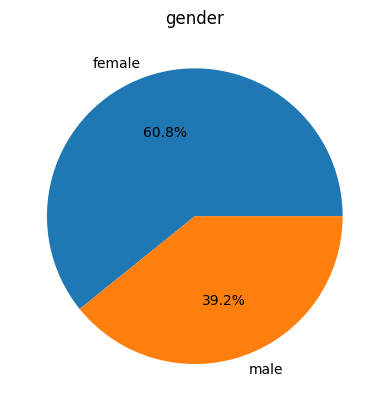

In [124]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns


gender_counts = data_cleaning['Gender'].value_counts()
label = gender_counts.index

label_mapping = {
    1 : 'female',
    2 : 'male'
}

label = [label_mapping.get(x) for x in label]

plt.pie(gender_counts, labels= label, autopct='%1.1f%%')
plt.title("gender")
plt.show()


(array([ 2.,  1.,  2.,  6.,  2., 11., 13., 21., 13., 13., 22., 17.]),
 array([2.2 , 2.35, 2.5 , 2.65, 2.8 , 2.95, 3.1 , 3.25, 3.4 , 3.55, 3.7 ,
        3.85, 4.  ]),
 <BarContainer object of 12 artists>)

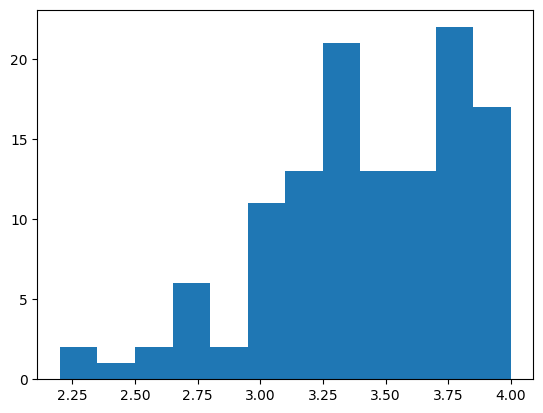

In [125]:
select_gpa = data_cleaning['GPA']
select_calories_chicken = data_cleaning['calories_chicken']

plt.hist('GPA', bins=12, data=data_cleaning)

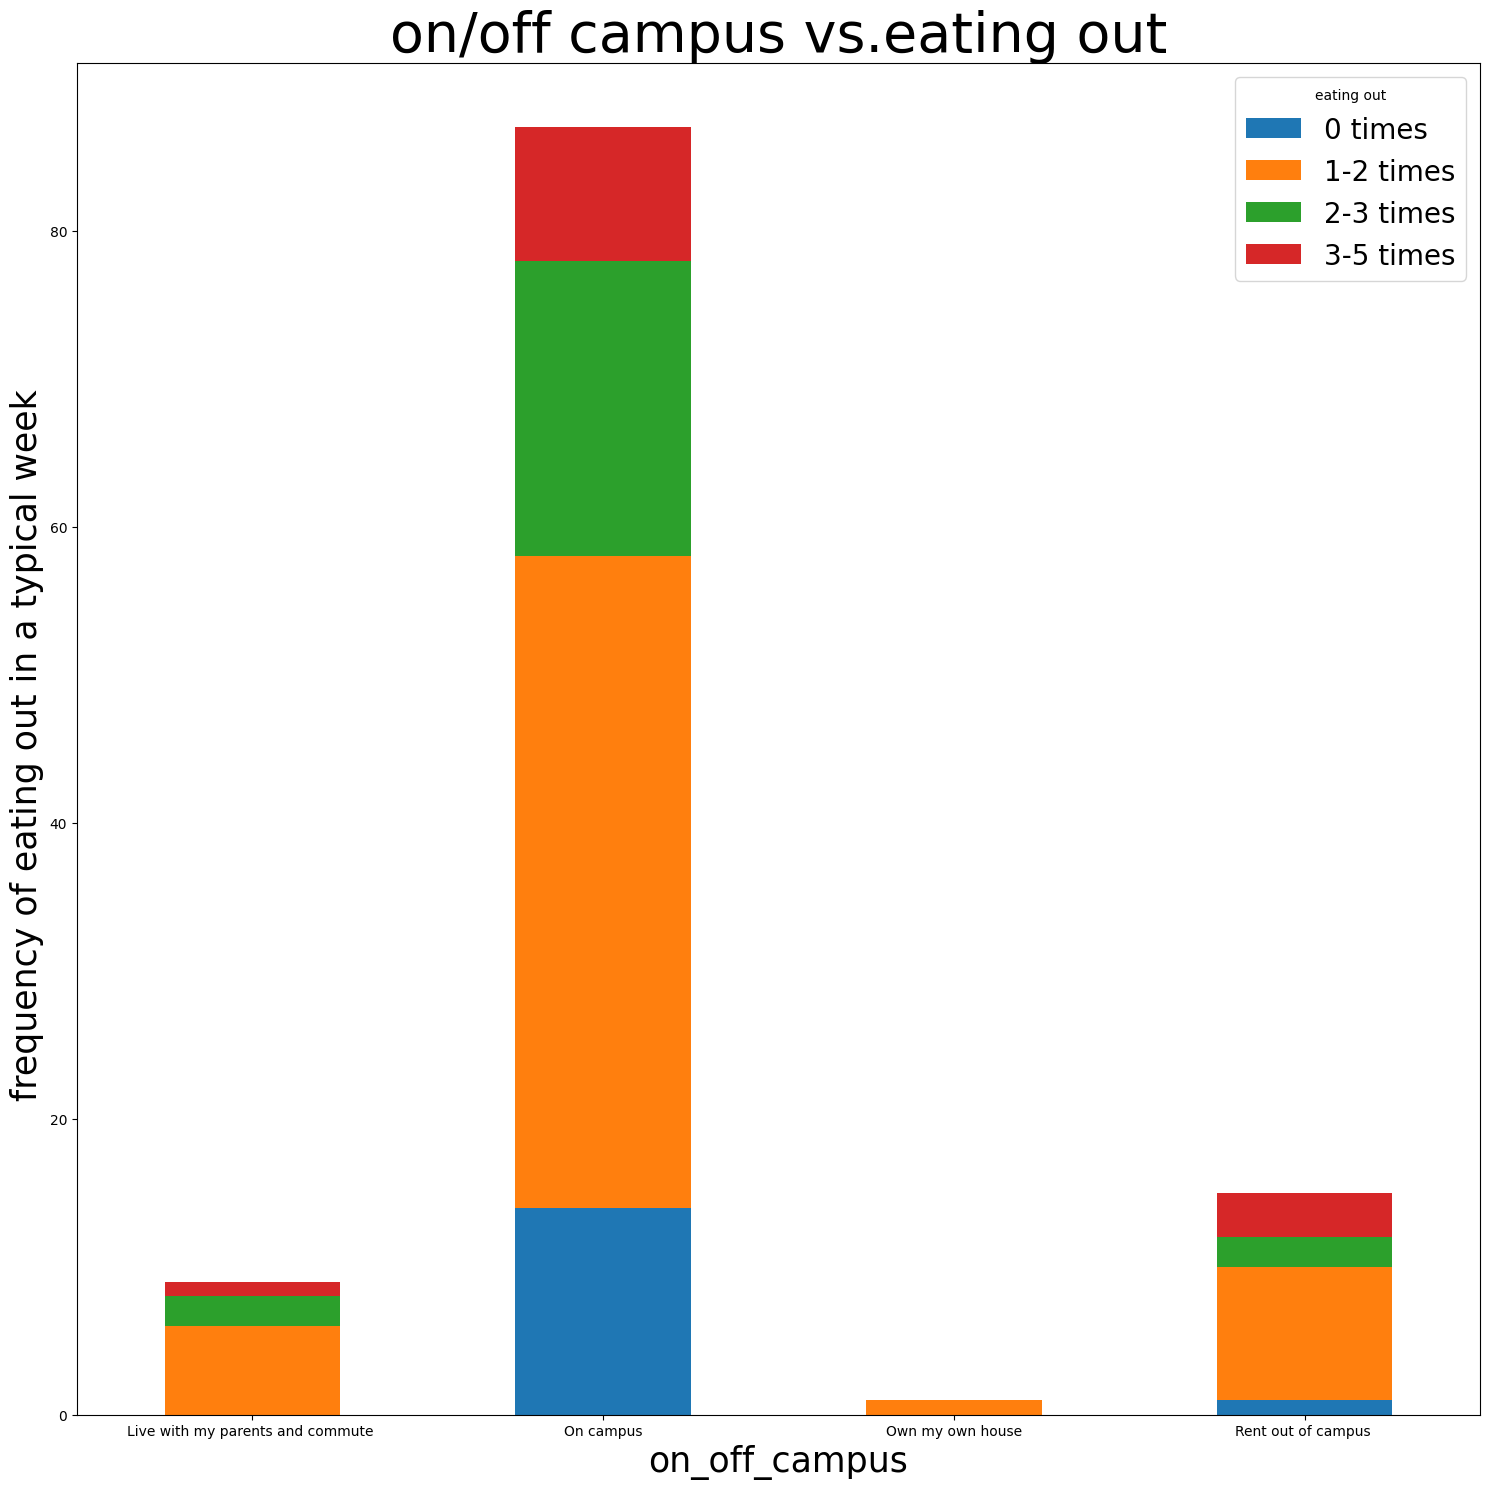

In [126]:
data_eatingout = pd.DataFrame()


eatingout_scale_mapping = {
    1: '0 times',
    2: '1-2 times',
    3: '2-3 times',
    4: '3-5 times'
}

on_off_scale_mapping = {
    1: 'On campus' ,
    2: 'Rent out of campus ',
    3: 'Live with my parents and commute ',
    4: 'Own my own house'

}

data_eatingout['eating_out'] = data_cleaning['eating_out'].map(eatingout_scale_mapping)


data_eatingout['on_off_campus'] = data_cleaning['on_off_campus'].map(on_off_scale_mapping)

(data_eatingout
 .groupby(['on_off_campus', 'eating_out'])
 .size()
 .unstack()
 .plot.bar(stacked=True, figsize = (15,15))
)

# Customize the plot
plt.xlabel('on_off_campus', size = 25)
plt.ylabel('frequency of eating out in a typical week ', size = 25)
plt.legend(title='eating out', fontsize= 20)
plt.title('on/off campus vs.eating out',size = 40)
plt.xticks(rotation=360)
plt.tight_layout()

# Show the plot
plt.show()

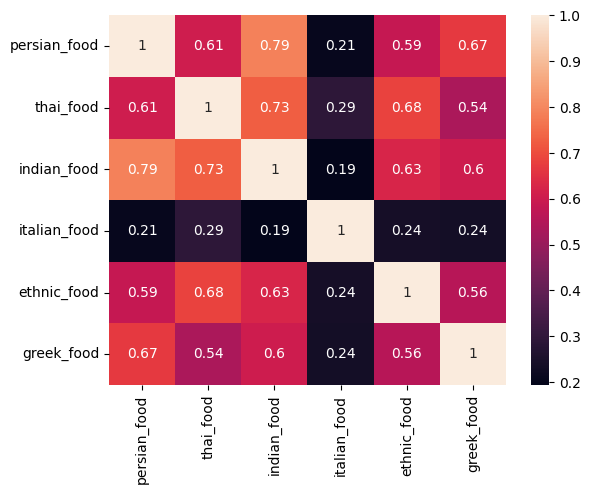

In [127]:
data_cuisine = data_cleaning[['persian_food', 'thai_food','indian_food', 'italian_food', 'ethnic_food', 'greek_food']].dropna()

cuisine_corr_matrix = data_cuisine.dropna().corr()

sns.heatmap(cuisine_corr_matrix, annot= True)

cuisine_corr_matrix.values[np.tril_indices_from(cuisine_corr_matrix)] = np.nan

top_correlations = (cuisine_corr_matrix.stack()
                    .sort_values(ascending=False)
                    .reset_index()
                    .rename(columns={0: 'correlation'})
                    .head(10))


    2: gender   - 0
    5: calories day - 19
    12: cusine - 17
    19: eating out 0
    20: employment - 9
    22: exercise - 13
    26: favorite cusine_coded - 0
    30: fruit day -0 
    33: healthy feel - 0
    40: life rewarding - 1
    46: on-off campus - 1
    50: self_perception weihgt - 1
    52: sport -2 
    57: veggiesday 0
    58: vitamins 0
    60: weight 2

## Future Goal:


* Handle Missing Value:
    - Either use mean of the variable or 
    - Apply machine learning prediction model to fill out.

* Apply more Statistic Analysis 


In [128]:
draw_tree(data_processed["comfort_food"][83]) #testing

data_processed[['comfort_food', 'comfort_food_nlp_processed']].sample(15, random_state = 13)

,comfort_food,comfort_food_nlp_processed
39,candy\rpop\rchocolate \rchipotle \rmoe's,"[candy, popcorn, chocolate, chipotle, moe's]"
55,"chips, dip, fries, pizza","[chip, dip, fry, pizza]"
15,"cookies, donuts, candy bars","[cooky, dougnuts, candy bar]"
14,"pizza, fruit, spaghetti, chicken and potatoes","[pizza, fruit, spaghetti, chicken, potato]"
56,"pizza, ice cream, chicken wings","[pizza, ice cream, chicken wing]"
30,"cookies, mac-n-cheese, brownies, french fries,","[cooky, mac and cheese, brownie, fry]"
90,"chips, ice cream, fruit snacks","[chip, ice cream, fruit snack]"
110,"ice-cream, pizza, chocolate","[ice cream, pizza, chocolate]"
83,"mashed potatoes, pasta","[mashed, potato, pasta]"
64,"cookies, nutella, ice cream, coffee, fruit","[cooky, nutella, ice cream, coffee, fruit]"
